In [1]:
import pandas as pd
import networkx as nx
import urllib as url
import matplotlib.pyplot as plt
import random
import time
import unicodedata
# pip install pandas
# pip install networkx

# for execution time can also try this in command line:
# time -v python yourprogram.py

In [2]:
start_time = time.time() # could maybe put this before the shortest graph
edge_file = open("wiki_data/links.tsv", "rb")
graph_names = nx.read_edgelist(edge_file)
graph_numbers = nx.read_edgelist(edge_file)
edge_file.close()

Below we can see that the data is encoded in *some* way. I am not 100% sure if the following cells 

In [3]:
nodes = pd.read_csv('wiki_data/articles.tsv', header=0)
nodes.head()

,Article_Name
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,%C3%85land
2,%C3%89douard_Manet
3,%C3%89ire
4,%C3%93engus_I_of_the_Picts


In [4]:
def format_string(url_str):
    url_parse = url.parse.unquote(url_str)
    return unicodedata.normalize('NFD', url_parse).encode('ascii', 'ignore').decode("utf-8", "replace")

nodes["Article_Name"] = nodes["Article_Name"].apply(format_string)
nodes["Article_Name"][50:80]

50               4th_century
51                 55_Cancri
52               55_Cancri_b
53               55_Cancri_c
54               55_Cancri_d
55               55_Cancri_e
56               5th_century
57                     6-2-0
58               6th_century
59               7th_century
60               8th_century
61               90377_Sedna
62               9th_century
63          A._E._J._Collins
64    ABO_blood_group_system
65                     AC_DC
66                      AIDS
67                     AK-47
68                   ALCO_FA
69                     ASCII
70                      AT&T
71          ATLAS_experiment
72         A_Christmas_Carol
73           A_Tale_of_a_Tub
74         A_Wrinkle_in_Time
75                A_cappella
76                    Aachen
77                  Aardvark
78                    Aarhus
79                     Abaca
Name: Article_Name, dtype: object

In [10]:
graph_nums = nx.convert_node_labels_to_integers(graph_names, first_label=0, ordering='default')

In [11]:
graph_nums.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [7]:
nx.set_node_attributes(graph, nodes.to_dict(), 'ArticleName')

NameError: name 'graph' is not defined

Just trying one of the layouts available. Obviously need to clean it up :)

In [ ]:
nx.draw_spring(graph_numbers)
plt.show()

In [ ]:
random_nodes = random.sample(list(graph.nodes()), 2)
random_nodes

In [ ]:
shortest_paths = nx.all_shortest_paths(graph, random_nodes[0], random_nodes[1])

In [ ]:
for path in shortest_paths:
    print(path)

print("--- %s seconds ---" % (time.time() - start_time))

I don't know what this is, but it has to be important 

In [ ]:
graph.nodes()

In [ ]:
nx.wiener_index(graph)

This code below is attempting to create a graph like the one here https://networkx.org/documentation/stable/auto_examples/graphviz_layout/plot_atlas.html#sphx-glr-auto-examples-graphviz-layout-plot-atlas-py

There is an error in some decoding at line 2

In [21]:
print(nx.number_connected_components(graph_nums), "connected components")

2 connected components


In [ ]:
import math

n = len(nodes)  # 150 nodes
# p value at which giant component (of size log(n) nodes) is expected
p_giant = 1.0 / (n - 1)
# p value at which graph is expected to become completely connected
p_conn = math.log(n) / n

# the following range of p values should be close to the threshold
pvals = [0.003, 0.006, 0.008, 0.015]

fig, axes = plt.subplots(2, 2)
for p, ax, seed in zip(pvals, axes.ravel(), range(len(pvals))):
    #### generate graph ####
    # identify connected/disconnected nodes
    connected = [n for n, d in graph_nums.degree() if d > 0]
    disconnected = list(set(graph_nums.nodes()) - set(connected))
    # identify largest connected component
    Gcc = sorted(nx.connected_components(graph_nums), key=len, reverse=True)
    G0 = graph_nums.subgraph(Gcc[0])
    #### draw graph ####
    pos = nx.nx_agraph.graphviz_layout(graph_nums)
    ax.set_title(f"p = {p:.3f}")
    # draw largest connected component
    options = {"ax": ax, "edge_color": "tab:red"}
    nx.draw_networkx_edges(G0, pos, width=6.0, **options)
    # draw other connected components
    for Gi in Gcc[1:]:
        if len(Gi) > 1:
            nx.draw_networkx_edges(graph_nums.subgraph(Gi), pos, alpha=0.3, width=5.0, **options)
    # draw connected/disconnected nodes
    options = {"ax": ax, "node_size": 30, "edgecolors": "white"}
    nx.draw(graph_nums, pos, nodelist=connected, **options)
    nx.draw(graph_nums, pos, nodelist=disconnected, alpha=0.25, **options)
fig.tight_layout()
plt.show()

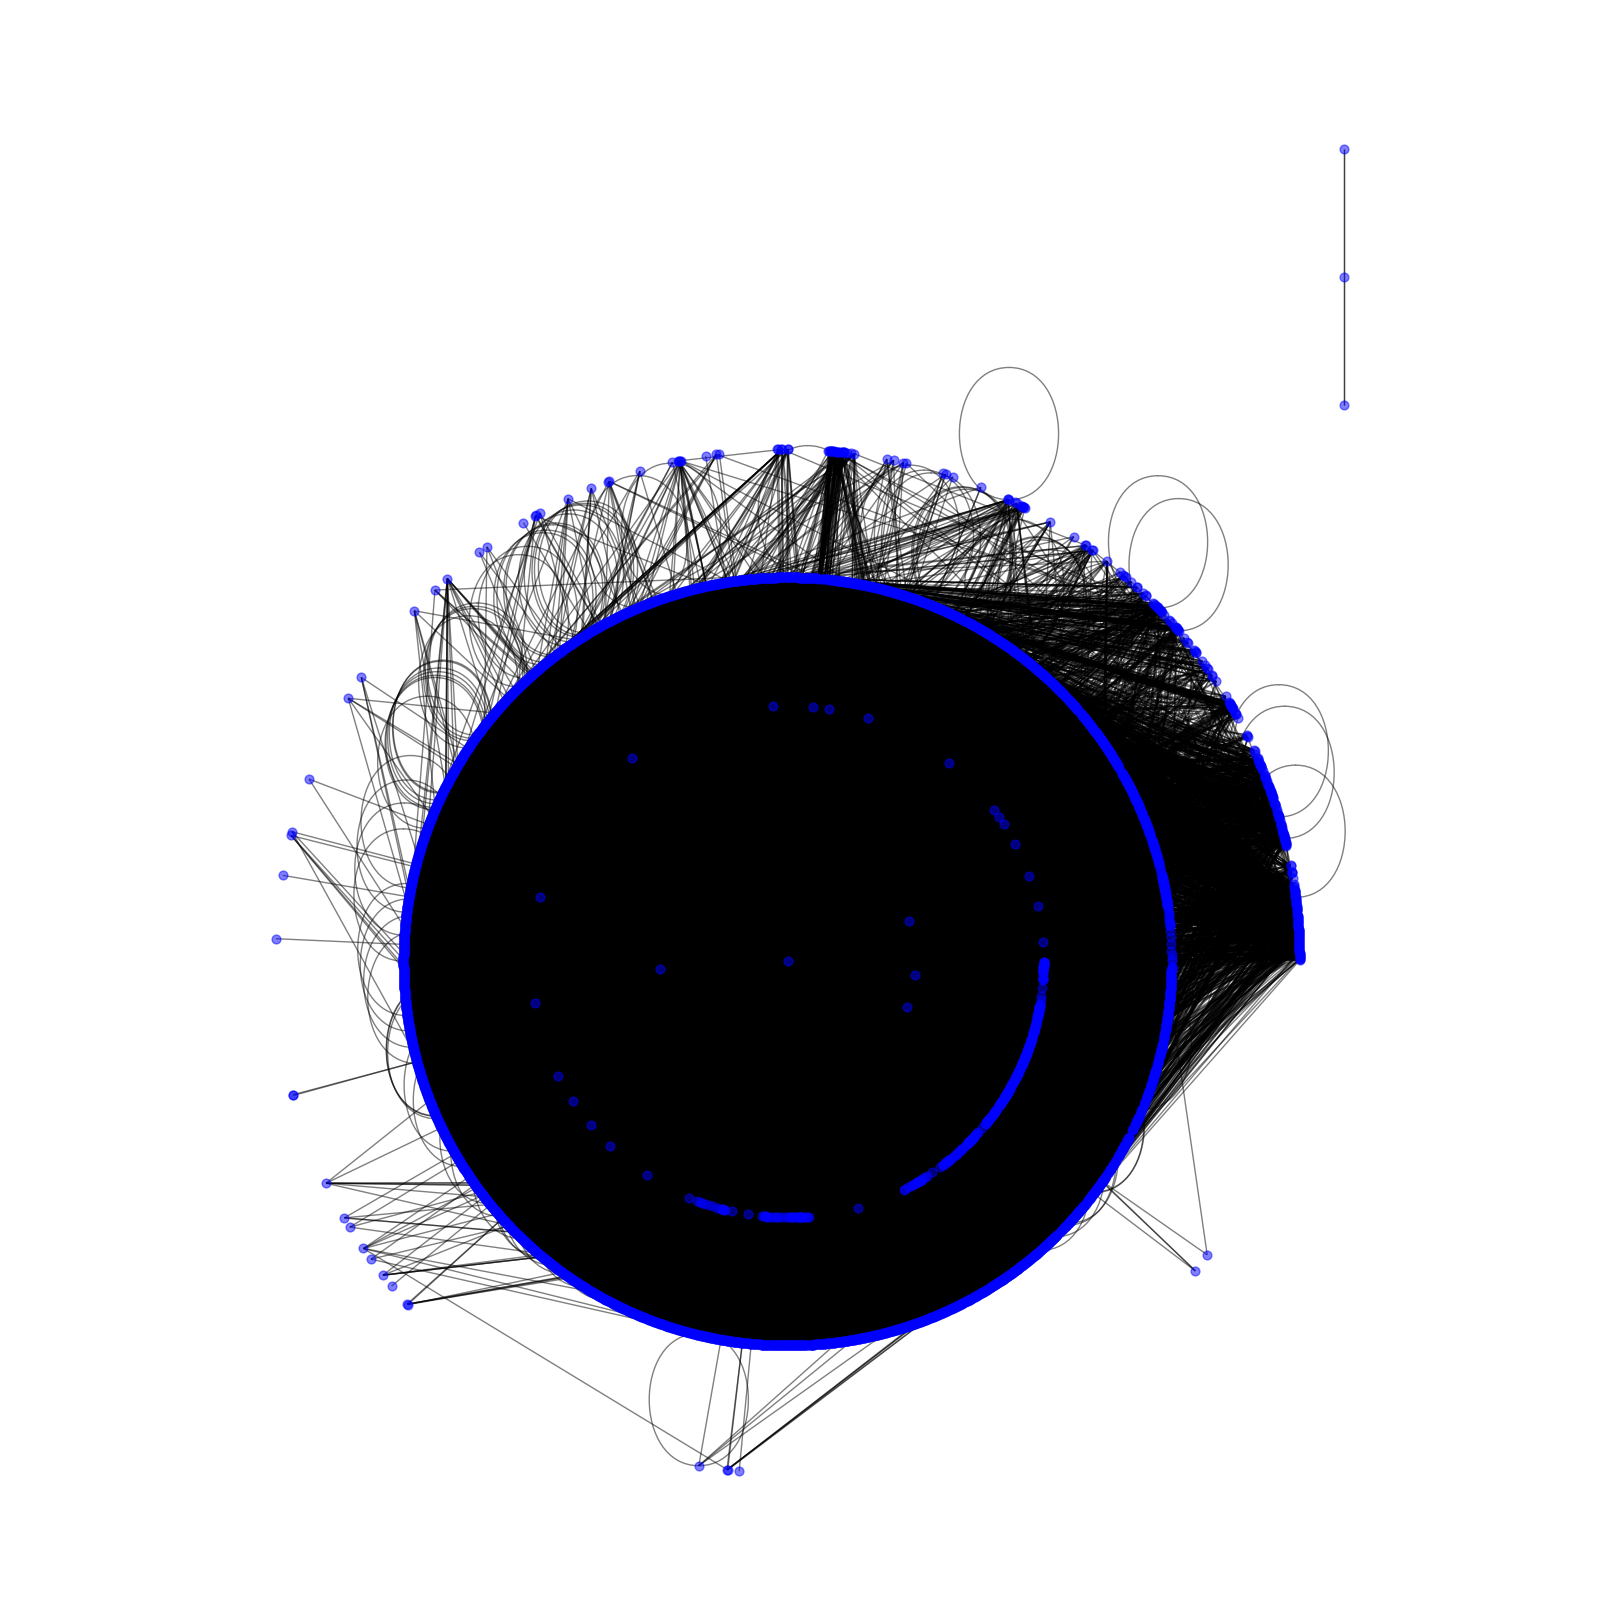

In [20]:
pos = nx.nx_agraph.graphviz_layout(graph_nums, prog="twopi", args="")
plt.figure(figsize=(16, 16))
nx.draw(graph_nums, pos, node_size=40, alpha=0.5, node_color="blue", with_labels=False)
plt.axis("equal")
plt.show()

In [ ]:
print("--- %s seconds ---" % (time.time() - start_time))